In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Получение данных
<em>Данные можно скачать от здесь - https://www.kaggle.com/code/ekaterinadranitsyna/russian-housing-evaluation-model<em>

In [145]:
df = pd.read_csv("/Users/superponny/PycharmProjects/stats_KDZ/prepare-data/all_v2.csv")

In [146]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [147]:
df.columns

Index(['price', 'date', 'time', 'geo_lat', 'geo_lon', 'region',
       'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area',
       'object_type'],
      dtype='object')

In [148]:
df.shape

(5477006, 13)

In [149]:
df.sample(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
215136,1850000,2018-10-07,19:43:34,45.039648,39.121750,2843,3,5,6,1,39.1,10.8,1
4207751,11650000,2020-08-03,02:21:46,60.017205,30.400646,2661,3,12,17,3,76.2,11.0,1
3599845,910000,2020-04-14,12:43:32,42.959926,47.528115,4007,2,3,11,1,38.3,14.6,11
1762596,3350000,2019-05-08,19:06:17,45.026224,39.106239,2843,4,3,16,2,58.0,12.0,1
2589419,2650000,2019-09-17,20:23:17,44.729694,37.748055,2843,2,12,15,1,36.0,12.0,1
206786,10897310,2018-10-05,14:57:05,55.568751,37.559604,3,2,26,33,3,93.7,20.2,11
2206053,12640320,2019-07-15,02:02:57,55.754047,37.620405,3,2,17,19,1,40.3,12.0,11
1425506,2500000,2019-03-22,15:10:16,44.548746,38.078865,2843,3,8,10,1,36.0,6.0,1
3142307,5200000,2020-01-16,18:12:25,55.792414,37.981068,81,1,2,17,2,52.0,9.0,1
1666977,5080000,2019-04-23,14:16:40,60.035400,30.446373,2661,1,16,18,2,55.0,10.0,1


In [150]:
df.shape

(5477006, 13)

In [151]:
a = pd.Series(df.rooms.value_counts())
a

 1     2067013
 2     1827514
 3     1097354
-1      306209
 4      152160
 5       22576
 6        2357
 7         788
 8         353
-2         343
 9         338
 10          1
Name: rooms, dtype: int64

<AxesSubplot:ylabel='rooms'>

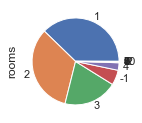

In [152]:
a.plot(kind = 'pie')

In [153]:
df.region.value_counts().index

Int64Index([ 9654,  2843,    81,  2661,     3,  6171,  2922,  3230,  5282,
             3991,  2604,  2871,  2722,  3870,  3106,  6817,  2072,  2900,
             3019,  3446,  1010,  5952,  5520,  7896,  4007,  4982,  2860,
             4417,  5368, 10160,  5241,  2359,  8090,  9648, 11171,  2880,
            13919,  9579,  5789,  2528,  2328,  7793,  4695, 11991,  4189,
             3153,  2484,  5993, 11416,  2594,  6937,  6543,  1491,  5794,
             5143,  4374,  8509,  4249, 10201,   821,  2885,  4240,  7873,
             4086,  8894,  7929,  2806,  7121, 10582,  8640,  6309,  5703,
             2814,  5736,  5178, 13913, 14368, 14880, 13098, 16705,    69,
             4963,  1901, 61888],
           dtype='int64')

<AxesSubplot:>

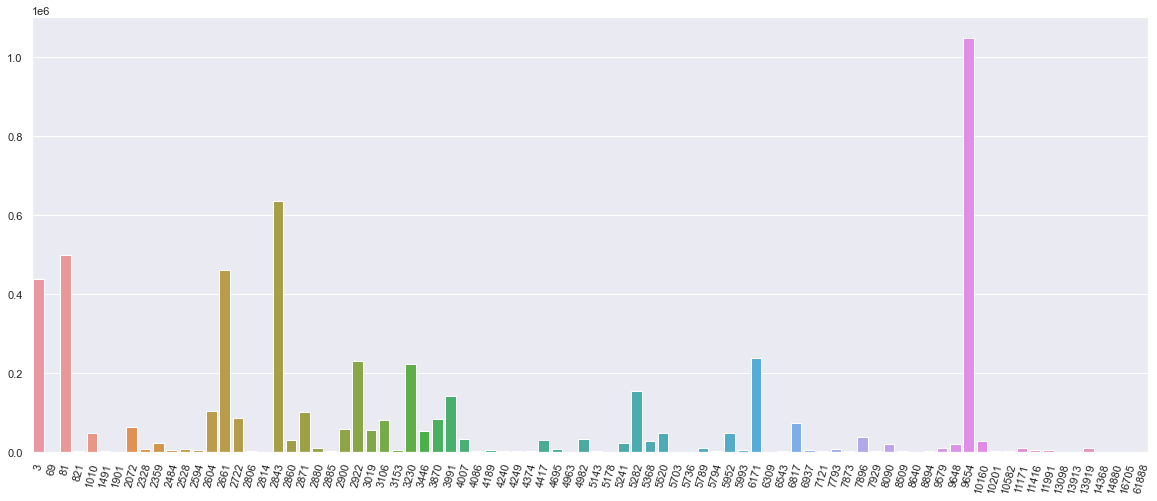

In [155]:
info = df.region.value_counts()
plt.xticks(rotation=75)
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x=df.region.value_counts().index, y=info.values)

<h3>Создание нового набора данных</h3>
    

Данные буду отбирать по ***территориальной принадлжености*** (Москва) и ***по количеству квартир*** (2)

In [156]:
df = df[(df["geo_lon"] <= 37.84241) & (df["geo_lon"] >= 37.39334)
         & (df["geo_lat"] >= 55.76421) & (df["geo_lat"] <= 55.8861)
         & (df["rooms"] == 2)]

In [157]:
df.sample(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
5030895,22000000,2021-02-14,23:04:42,55.774598,37.545950,3,2,18,24,2,78.00,19.00,1
5379063,9200000,2021-04-22,15:14:01,55.813027,37.563266,3,4,2,9,2,37.00,6.00,1
4843866,9600000,2020-12-11,17:34:28,55.834901,37.488305,3,1,1,5,2,45.10,5.00,1
4729258,9800000,2020-11-18,19:59:51,55.876915,37.687940,3,1,7,12,2,46.00,7.00,1
4856237,6926225,2020-12-15,01:27:08,55.849792,37.689860,3,2,2,14,2,37.90,3.00,11
2510730,15500000,2019-09-04,16:33:58,55.773536,37.599860,3,3,1,8,2,56.00,9.00,1
1226717,8120702,2019-02-25,16:57:36,55.782015,37.509717,3,2,2,20,2,55.90,18.60,11
755688,10093967,2018-12-18,14:08:01,55.799006,37.768175,3,2,2,8,2,62.27,23.26,11
4385041,7689045,2020-09-14,13:12:38,55.770856,37.517985,3,2,13,22,2,39.30,17.80,11
2303032,12746675,2019-07-30,16:45:17,55.803000,37.591550,3,2,35,38,2,71.50,17.40,11


<AxesSubplot:>

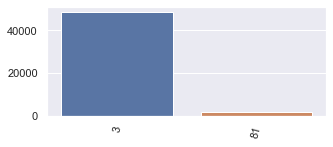

In [160]:
info = df.region.value_counts()
plt.xticks(rotation=75)
sns.set(rc = {'figure.figsize':(5,2)})
sns.barplot(x=df.region.value_counts().index, y=info.values)

<AxesSubplot:>

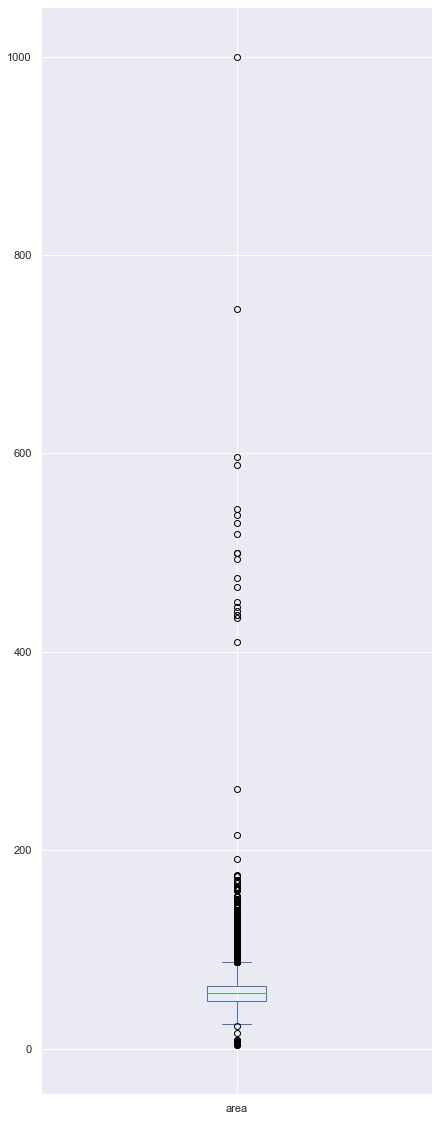

In [161]:
df['area'].plot(kind = 'box',figsize=(7,20))

Из данных о площади видно, что в выборке содержится большое количество выбросов. **Перед обучением модели их стоит убрать**.

<AxesSubplot:>

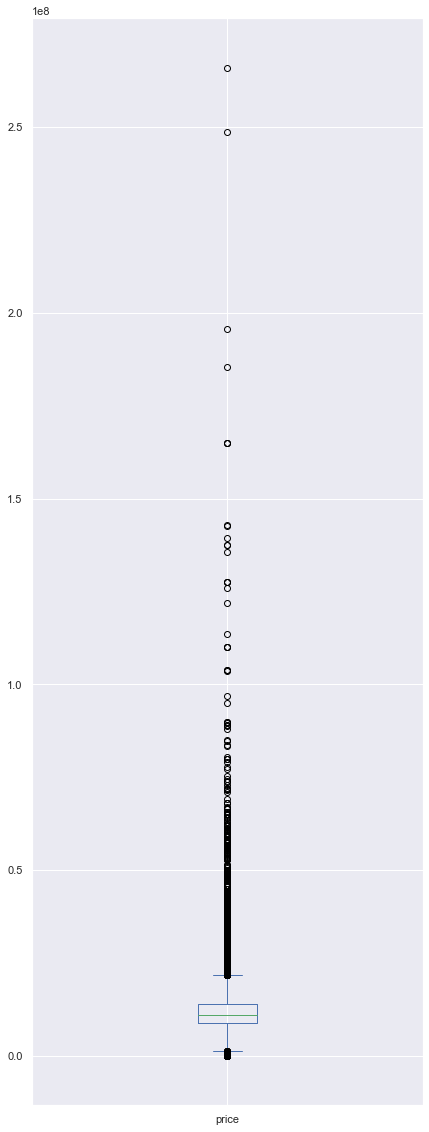

In [162]:
df['price'].plot(kind = 'box',figsize=(7,20))

Стоит также пофильтровать данные по ценам

<AxesSubplot:ylabel='building_type'>

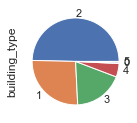

In [163]:
df['building_type'].value_counts().plot(kind = 'pie')

Типы фасадов:

0 - Other

1 - Panel

2 - Monolithic

3 - Brick

4 - Blocky

5 - Wooden

<AxesSubplot:ylabel='object_type'>

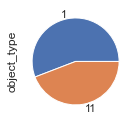

In [164]:
df['object_type'].value_counts().plot(kind = 'pie')

Тип домов:

1 - Secondary real estate market

11 - New building


<AxesSubplot:>

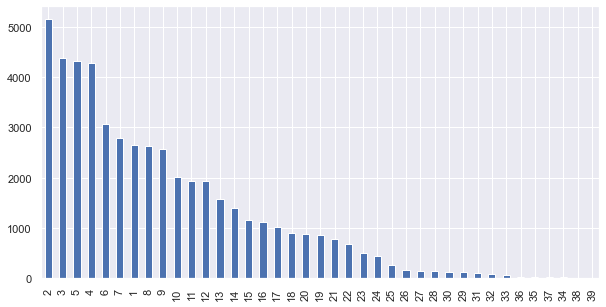

In [165]:
df['level'].value_counts().plot(kind = 'bar', figsize=(10,5))

<AxesSubplot:>

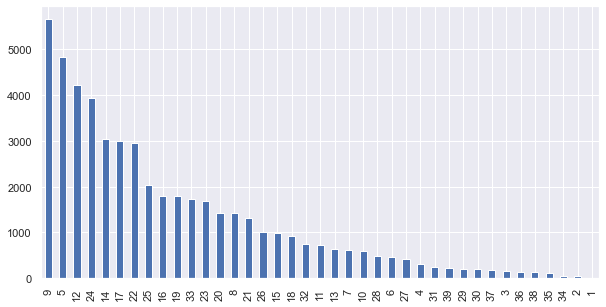

In [166]:
df['levels'].value_counts().plot(kind = 'bar', figsize=(10,5))

In [167]:
df_without_srt = df
df_without_srt.drop(['date','time'], axis = 1, inplace = True)
df_without_srt.head(10)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
150,8806100,55.872870,37.593110,3,1,5,24,2,53.5,18.5,11
384,13293000,55.790968,37.475395,3,2,3,14,2,64.4,14.0,11
1536,10600000,55.813353,37.632791,3,3,2,8,2,67.0,8.0,1
1938,14250000,55.806940,37.646392,3,2,6,12,2,69.0,13.0,11
1942,11990000,55.808834,37.649427,3,2,3,9,2,60.0,13.0,11
2039,7300000,55.880666,37.686428,3,3,1,9,2,50.0,7.0,1
2108,15990000,55.795249,37.525945,3,2,8,15,2,54.4,6.0,11
2109,19000000,55.795249,37.525945,3,2,3,15,2,74.2,13.5,11
2112,15200000,55.809934,37.727885,3,2,20,30,2,64.0,12.0,1
2298,8150000,55.815681,37.491817,3,3,3,3,2,49.0,8.0,1


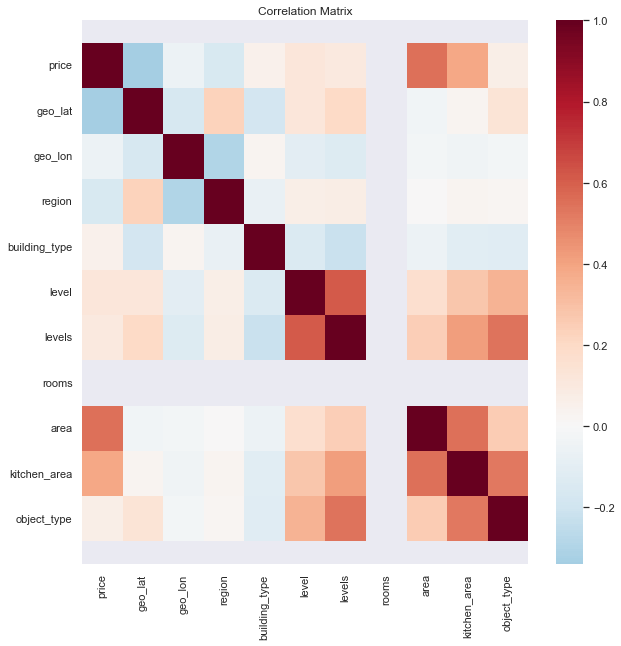

In [168]:
correlation = df.corr()
sns.set(rc = {'figure.figsize':(10,10)})
ax = sns.heatmap(correlation, center=0, cmap='RdBu_r')
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='object_type', ylabel='price'>

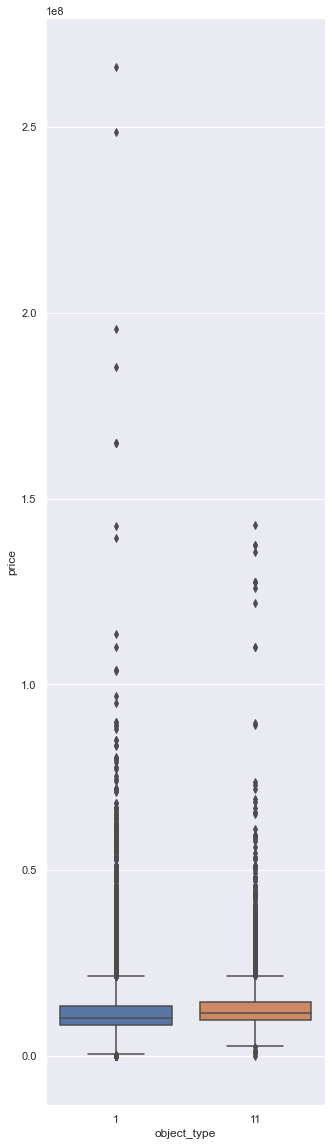

In [106]:
sns.set(rc = {'figure.figsize':(5,20)})
sns.boxplot(x = df['object_type'], y = df['price'])

# Feature Engineering

1. Произведу котегоризацию по этажей квартиры 

In [169]:
df['first floor'] = 1
df['2 <= x <= 5'] = 1
df['6 <= x <= 9'] = 1
df['10 <= x <= 12'] = 1
df['13 <= x <= 17'] = 1
df['18 <= x'] = 1
df['first floor'] = np.where((df.level != 1), 0, df['first floor'])
df['2 <= x <= 5'] = np.where((2 > df.level) | (df.level > 5), 0, df['2 <= x <= 5'])
df['6 <= x <= 9'] = np.where((6 > df.level) | (df.level > 9), 0, df['6 <= x <= 9'])
df['10 <= x <= 12'] = np.where((10 > df.level) | (df.level > 12), 0, df['10 <= x <= 12'])
df['13 <= x <= 17'] = np.where((13 > df.level) | (df.level > 17), 0, df['13 <= x <= 17'])
df['18 <= x'] = np.where((18 > df.level), 0, df['18 <= x'])

In [170]:
#df.drop('level', axis = 1, inplace = True)

In [171]:
df.head(10)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,first floor,2 <= x <= 5,6 <= x <= 9,10 <= x <= 12,13 <= x <= 17,18 <= x
150,8806100,55.872870,37.593110,3,1,5,24,2,53.5,18.5,11,0,1,0,0,0,0
384,13293000,55.790968,37.475395,3,2,3,14,2,64.4,14.0,11,0,1,0,0,0,0
1536,10600000,55.813353,37.632791,3,3,2,8,2,67.0,8.0,1,0,1,0,0,0,0
1938,14250000,55.806940,37.646392,3,2,6,12,2,69.0,13.0,11,0,0,1,0,0,0
1942,11990000,55.808834,37.649427,3,2,3,9,2,60.0,13.0,11,0,1,0,0,0,0
2039,7300000,55.880666,37.686428,3,3,1,9,2,50.0,7.0,1,1,0,0,0,0,0
2108,15990000,55.795249,37.525945,3,2,8,15,2,54.4,6.0,11,0,0,1,0,0,0
2109,19000000,55.795249,37.525945,3,2,3,15,2,74.2,13.5,11,0,1,0,0,0,0
2112,15200000,55.809934,37.727885,3,2,20,30,2,64.0,12.0,1,0,0,0,0,0,1
2298,8150000,55.815681,37.491817,3,3,3,3,2,49.0,8.0,1,0,1,0,0,0,0


2. Проебразую количество этажей в сдании

   Сделаю новый столбец в котором в процентах будет показываться уровень от максимума на котором находиться квартира

In [173]:
df['level_prop'] = df['level']/df['levels']
df.head(10)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,first floor,2 <= x <= 5,6 <= x <= 9,10 <= x <= 12,13 <= x <= 17,18 <= x,level_prop
150,8806100,55.872870,37.593110,3,1,5,24,2,53.5,18.5,11,0,1,0,0,0,0,0.208333
384,13293000,55.790968,37.475395,3,2,3,14,2,64.4,14.0,11,0,1,0,0,0,0,0.214286
1536,10600000,55.813353,37.632791,3,3,2,8,2,67.0,8.0,1,0,1,0,0,0,0,0.250000
1938,14250000,55.806940,37.646392,3,2,6,12,2,69.0,13.0,11,0,0,1,0,0,0,0.500000
1942,11990000,55.808834,37.649427,3,2,3,9,2,60.0,13.0,11,0,1,0,0,0,0,0.333333
2039,7300000,55.880666,37.686428,3,3,1,9,2,50.0,7.0,1,1,0,0,0,0,0,0.111111
2108,15990000,55.795249,37.525945,3,2,8,15,2,54.4,6.0,11,0,0,1,0,0,0,0.533333
2109,19000000,55.795249,37.525945,3,2,3,15,2,74.2,13.5,11,0,1,0,0,0,0,0.200000
2112,15200000,55.809934,37.727885,3,2,20,30,2,64.0,12.0,1,0,0,0,0,0,1,0.666667
2298,8150000,55.815681,37.491817,3,3,3,3,2,49.0,8.0,1,0,1,0,0,0,0,1.000000


3. Категоризую столбец **object_type**

In [175]:
df['new'] = 0
df['old'] = 0
df['new'] = np.where((df.object_type == 1), 1, df['new'])
df['old'] = np.where((df.object_type == 11), 1, df['old'])
df.drop('object_type', axis = 1, inplace = True)

In [176]:
df.head(10)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,first floor,2 <= x <= 5,6 <= x <= 9,10 <= x <= 12,13 <= x <= 17,18 <= x,level_prop,new,old
150,8806100,55.872870,37.593110,3,1,5,24,2,53.5,18.5,0,1,0,0,0,0,0.208333,0,1
384,13293000,55.790968,37.475395,3,2,3,14,2,64.4,14.0,0,1,0,0,0,0,0.214286,0,1
1536,10600000,55.813353,37.632791,3,3,2,8,2,67.0,8.0,0,1,0,0,0,0,0.250000,1,0
1938,14250000,55.806940,37.646392,3,2,6,12,2,69.0,13.0,0,0,1,0,0,0,0.500000,0,1
1942,11990000,55.808834,37.649427,3,2,3,9,2,60.0,13.0,0,1,0,0,0,0,0.333333,0,1
2039,7300000,55.880666,37.686428,3,3,1,9,2,50.0,7.0,1,0,0,0,0,0,0.111111,1,0
2108,15990000,55.795249,37.525945,3,2,8,15,2,54.4,6.0,0,0,1,0,0,0,0.533333,0,1
2109,19000000,55.795249,37.525945,3,2,3,15,2,74.2,13.5,0,1,0,0,0,0,0.200000,0,1
2112,15200000,55.809934,37.727885,3,2,20,30,2,64.0,12.0,0,0,0,0,0,1,0.666667,1,0
2298,8150000,55.815681,37.491817,3,3,3,3,2,49.0,8.0,0,1,0,0,0,0,1.000000,1,0


4. Категоризую столбец **building_type**


0 - Other

1 - Panel

2 - Monolithic

3 - Brick

4 - Blocky

5 - Wooden

In [179]:
df['Other'] = 0
df['Panel'] = 0
df['Monolithic'] = 0
df['Brick'] = 0
df['Blocky'] = 0
df['Wooden'] = 0
df['Other'] = np.where((df.building_type == 0), 1, df['Other'])
df['Panel'] = np.where((df.building_type == 1), 1, df['Panel'])
df['Brick'] = np.where((df.building_type == 3), 1, df['Brick'])
df['Blocky'] = np.where((df.building_type == 4), 1, df['Blocky'])
df['Wooden'] = np.where((df.building_type == 5), 1, df['Wooden'])
df['Monolithic'] = np.where((df.building_type == 2), 1, df['Monolithic'])
df.head(10)

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,first floor,2 <= x <= 5,6 <= x <= 9,10 <= x <= 12,13 <= x <= 17,18 <= x,level_prop,new,old,Other,Panel,Monolithic,Brick,Blocky,Wooden
150,8806100,55.872870,37.593110,3,1,5,24,2,53.5,18.5,0,1,0,0,0,0,0.208333,0,1,0,1,0,0,0,0
384,13293000,55.790968,37.475395,3,2,3,14,2,64.4,14.0,0,1,0,0,0,0,0.214286,0,1,0,0,1,0,0,0
1536,10600000,55.813353,37.632791,3,3,2,8,2,67.0,8.0,0,1,0,0,0,0,0.250000,1,0,0,0,0,1,0,0
1938,14250000,55.806940,37.646392,3,2,6,12,2,69.0,13.0,0,0,1,0,0,0,0.500000,0,1,0,0,1,0,0,0
1942,11990000,55.808834,37.649427,3,2,3,9,2,60.0,13.0,0,1,0,0,0,0,0.333333,0,1,0,0,1,0,0,0
2039,7300000,55.880666,37.686428,3,3,1,9,2,50.0,7.0,1,0,0,0,0,0,0.111111,1,0,0,0,0,1,0,0
2108,15990000,55.795249,37.525945,3,2,8,15,2,54.4,6.0,0,0,1,0,0,0,0.533333,0,1,0,0,1,0,0,0
2109,19000000,55.795249,37.525945,3,2,3,15,2,74.2,13.5,0,1,0,0,0,0,0.200000,0,1,0,0,1,0,0,0
2112,15200000,55.809934,37.727885,3,2,20,30,2,64.0,12.0,0,0,0,0,0,1,0.666667,1,0,0,0,1,0,0,0
2298,8150000,55.815681,37.491817,3,3,3,3,2,49.0,8.0,0,1,0,0,0,0,1.000000,1,0,0,0,0,1,0,0
